# **Oregon Wildfire Analysis - Exploring Relationships**

## **Contents**
### i. Abbreviations 
### ii. Size Classifications
### 01. Importing Libraries and Data
### 02. Exploring Relationships
    Correlations
    Scatterplots
    Pair Plots
    Categorical Plots
### 03. Revisting Questions
### 04. Hypotheses
### 05. Exporting Data

## **i. Abbreviations**

#### Areas:
    EOA - Eastern Oregon Area
    SOA - Southwest Oregon Area
    NOA - Northwest Oregon Area

#### Land Own Types:
    BIA - Bureau of Indian Affairs
    BLM - Bureau of Land Management
    NPS - National Parks Service
    USFS - United States Forest Service
    

## **ii. Size Classifications**

### Oregon Wildfire Size Classification:
In Oregon, the wildfire size classes are based on the area burned, and they are classified as follows:

    • Class A: 0.25 acres or less
    • Class B: More than 0.25 acres, but less than 10 acres
    • Class C: 10 acres or more, but less than 100 acres
    • Class D: 100 acres or more, but less than 300 acres
    • Class E: 300 acres or more, but less than 1,000 acres
    • Class F: 1,000 acres or more, but less than 5,000 acres
    • Class G: 5,000 acres or more


## **01. Importing Libraries and Data**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from IPython.display import Image, display

In [3]:
# Create a path to project folder
path = r'C:\Users\jboer\OneDrive\Documents\Career Foundry\Oregon Wildfire Analysis'

In [4]:
# Importing dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fire_occurrence_clean.csv'), index_col = False)

## **02. Exploring Relationships**

### **Correlations**

In [5]:
# Checking df shape
df.shape

(23480, 20)

In [6]:
# Checking variables to use in exploratory analysis
df.head()

,Unnamed: 0,FireYear,Area,DistrictName,UnitName,FireName,SizeClass,EstTotalAcres,ProtectedAcres,HumanOrLightning,CauseBy,GeneralCause,Latitude,Longitude,LandOwnType,County,IgniteDateTime,ReportDateTime,DiscoverDateTime,ControlDateTime
0,0,2000,EOA,Central Oregon,John Day,Slick Ear #2,B,0.75,0.75,Lightning,Lightning,Lightning,44.91519,-119.28863,BLM,Grant,2000-07-18 19:00:00,2000-07-19 13:20:00,2000-07-19 13:15:00,2000-07-20 00:50:00
1,1,2000,EOA,Northeast Oregon,La Grande,Woodley,C,80.00,80.00,Lightning,Lightning,Lightning,45.08509,-118.33440,Other Private,Union,2000-08-24 05:30:00,2000-08-24 13:07:00,2000-08-24 13:07:00,2000-09-01 21:30:00
2,2,2001,SOA,Southwest Oregon,Grants Pass,QUEENS BRANCH,A,0.10,0.10,Human,Motorist,Smoking,42.53671,-123.21215,BLM,Jackson,2001-08-10 17:40:00,2001-08-10 17:47:00,2001-08-10 17:45:00,2001-08-10 18:30:00
3,3,2002,NOA,West Oregon,Philomath,WREN,A,0.01,0.01,Human,Motorist,Recreation,44.58709,-123.42779,State,Benton,2002-07-06 13:01:00,2002-07-06 13:04:00,2002-07-06 13:02:00,2002-07-06 13:07:00
4,4,2003,NOA,West Oregon,Dallas,Ritner Creek,A,0.01,0.01,Lightning,Lightning,Lightning,44.74026,-123.49811,Industrial,Polk,2003-08-22 04:00:00,2003-08-22 05:00:00,2003-08-22 05:00:00,2003-08-22 09:30:00


In [7]:
# Removing "Unnamed: 0" index column
df.drop(columns=['Unnamed: 0'])

,FireYear,Area,DistrictName,UnitName,FireName,SizeClass,EstTotalAcres,ProtectedAcres,HumanOrLightning,CauseBy,GeneralCause,Latitude,Longitude,LandOwnType,County,IgniteDateTime,ReportDateTime,DiscoverDateTime,ControlDateTime
0,2000,EOA,Central Oregon,John Day,Slick Ear #2,B,0.75,0.75,Lightning,Lightning,Lightning,44.91519,-119.28863,BLM,Grant,2000-07-18 19:00:00,2000-07-19 13:20:00,2000-07-19 13:15:00,2000-07-20 00:50:00
1,2000,EOA,Northeast Oregon,La Grande,Woodley,C,80.00,80.00,Lightning,Lightning,Lightning,45.08509,-118.33440,Other Private,Union,2000-08-24 05:30:00,2000-08-24 13:07:00,2000-08-24 13:07:00,2000-09-01 21:30:00
2,2001,SOA,Southwest Oregon,Grants Pass,QUEENS BRANCH,A,0.10,0.10,Human,Motorist,Smoking,42.53671,-123.21215,BLM,Jackson,2001-08-10 17:40:00,2001-08-10 17:47:00,2001-08-10 17:45:00,2001-08-10 18:30:00
3,2002,NOA,West Oregon,Philomath,WREN,A,0.01,0.01,Human,Motorist,Recreation,44.58709,-123.42779,State,Benton,2002-07-06 13:01:00,2002-07-06 13:04:00,2002-07-06 13:02:00,2002-07-06 13:07:00
4,2003,NOA,West Oregon,Dallas,Ritner Creek,A,0.01,0.01,Lightning,Lightning,Lightning,44.74026,-123.49811,Industrial,Polk,2003-08-22 04:00:00,2003-08-22 05:00:00,2003-08-22 05:00:00,2003-08-22 09:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23475,2021,EOA,Walker Range - WRFPA,Crescent,Road 2430,B,0.75,0.75,Human,Recreationist,Equipment Use,43.52875,-121.35672,Industrial,Klamath,2021-06-26 16:00:00,2021-06-26 16:58:00,2021-06-26 16:45:00,2021-06-26 21:58:00
23476,2022,SOA,Western Lane,Veneta,Spruce Path,A,0.01,0.01,Human,Transient,Recreation,43.97600,-124.09933,Municipal,Lane,2022-09-13 11:20:00,2022-09-13 11:20:00,2022-09-13 11:20:00,2022-09-13 12:14:00
23477,2021,EOA,Northeast Oregon,Pendleton,Bone Canyon,C,67.43,67.43,Lightning,Lightning,Lightning,45.01056,-119.08639,BLM,Umatilla,2021-06-13 17:22:00,2021-06-14 12:45:00,2021-06-14 12:45:00,2021-06-17 17:10:00
23478,2022,EOA,Northeast Oregon,Pendleton,Milepost 231,A,0.10,0.00,Human,Motorist,Equipment Use,45.58639,-118.46167,State,Umatilla,2022-08-19 15:09:00,2022-08-19 15:09:00,2022-08-19 15:09:00,2022-08-19 16:41:00


In [8]:
# Creating a subset of variables for exploratory analysis
sub = df[['FireYear','Area','SizeClass','EstTotalAcres','ProtectedAcres','HumanOrLightning','LandOwnType']]

In [9]:
# Applying one-hot encoding to categorical columns of subset
sub_encoded = pd.get_dummies(sub, columns=['Area','SizeClass','HumanOrLightning','LandOwnType'])

In [10]:
# Creating correlation matrix of encoded subset
sub_encoded.corr()

,FireYear,EstTotalAcres,ProtectedAcres,Area_EOA,Area_NOA,Area_SOA,SizeClass_A,SizeClass_B,SizeClass_C,SizeClass_D,...,LandOwnType_Industrial,LandOwnType_Municipal,LandOwnType_NPS,LandOwnType_Ocean Shores,LandOwnType_Other Private,LandOwnType_Other Public,LandOwnType_Rural Residential,LandOwnType_Small Woodlands,LandOwnType_State,LandOwnType_USFS
FireYear,1.000000,0.011114,0.022625,-0.055701,-0.028459,0.072999,-0.016094,0.005852,0.015370,-0.000844,...,-0.064097,0.017847,-0.005619,-0.029544,-0.009142,-0.021429,-0.055757,0.084927,0.025171,0.033561
EstTotalAcres,0.011114,1.000000,0.553732,0.016409,-0.006466,-0.010684,-0.063449,-0.020538,-0.006660,-0.001215,...,-0.012768,-0.003309,-0.000256,-0.002841,-0.011941,-0.005161,-0.021262,-0.009979,-0.010648,0.226722
ProtectedAcres,0.022625,0.553732,1.000000,0.010247,0.000482,-0.009965,-0.051653,-0.016341,-0.003154,0.003825,...,-0.008190,-0.002859,-0.000208,-0.002313,-0.009853,-0.004151,-0.015431,-0.006071,-0.006860,0.145328
Area_EOA,-0.055701,0.016409,0.010247,1.000000,-0.300770,-0.719066,-0.062688,0.001085,0.064978,0.055224,...,0.090957,-0.030668,-0.004542,-0.050506,0.172193,-0.029222,-0.123515,0.106345,-0.056011,0.071207
Area_NOA,-0.028459,-0.006466,0.000482,-0.300770,1.000000,-0.446491,0.014604,0.006979,-0.020948,-0.016678,...,-0.016100,0.015550,-0.002820,0.093393,-0.025088,0.025564,0.054542,-0.025777,0.070609,-0.042347
Area_SOA,0.072999,-0.010684,-0.009965,-0.719066,-0.446491,1.000000,0.048174,-0.006104,-0.045700,-0.039660,...,-0.073607,0.017443,0.006317,-0.020668,-0.143276,0.008789,0.076142,-0.080993,0.001100,-0.035951
SizeClass_A,-0.016094,-0.063449,-0.051653,-0.062688,0.014604,0.048174,1.000000,-0.856309,-0.315067,-0.146000,...,-0.017558,0.006009,0.004027,0.039493,-0.038955,0.023740,0.048241,-0.064765,0.058006,-0.099112
SizeClass_B,0.005852,-0.020538,-0.016341,0.001085,0.006979,-0.006104,-0.856309,1.000000,-0.102708,-0.047594,...,0.008826,0.001513,-0.003448,-0.032627,0.018797,-0.014403,-0.003666,0.058430,-0.045554,-0.001527
SizeClass_C,0.015370,-0.006660,-0.003154,0.064978,-0.020948,-0.045700,-0.315067,-0.102708,1.000000,-0.017512,...,0.028608,-0.010011,-0.001269,-0.014107,0.038648,-0.009986,-0.062670,0.031257,-0.019486,0.040675
SizeClass_D,-0.000844,-0.001215,0.003825,0.055224,-0.016678,-0.039660,-0.146000,-0.047594,-0.017512,1.000000,...,0.013554,-0.008158,-0.000588,-0.006537,0.029661,-0.011919,-0.030519,-0.004038,-0.008544,0.033116


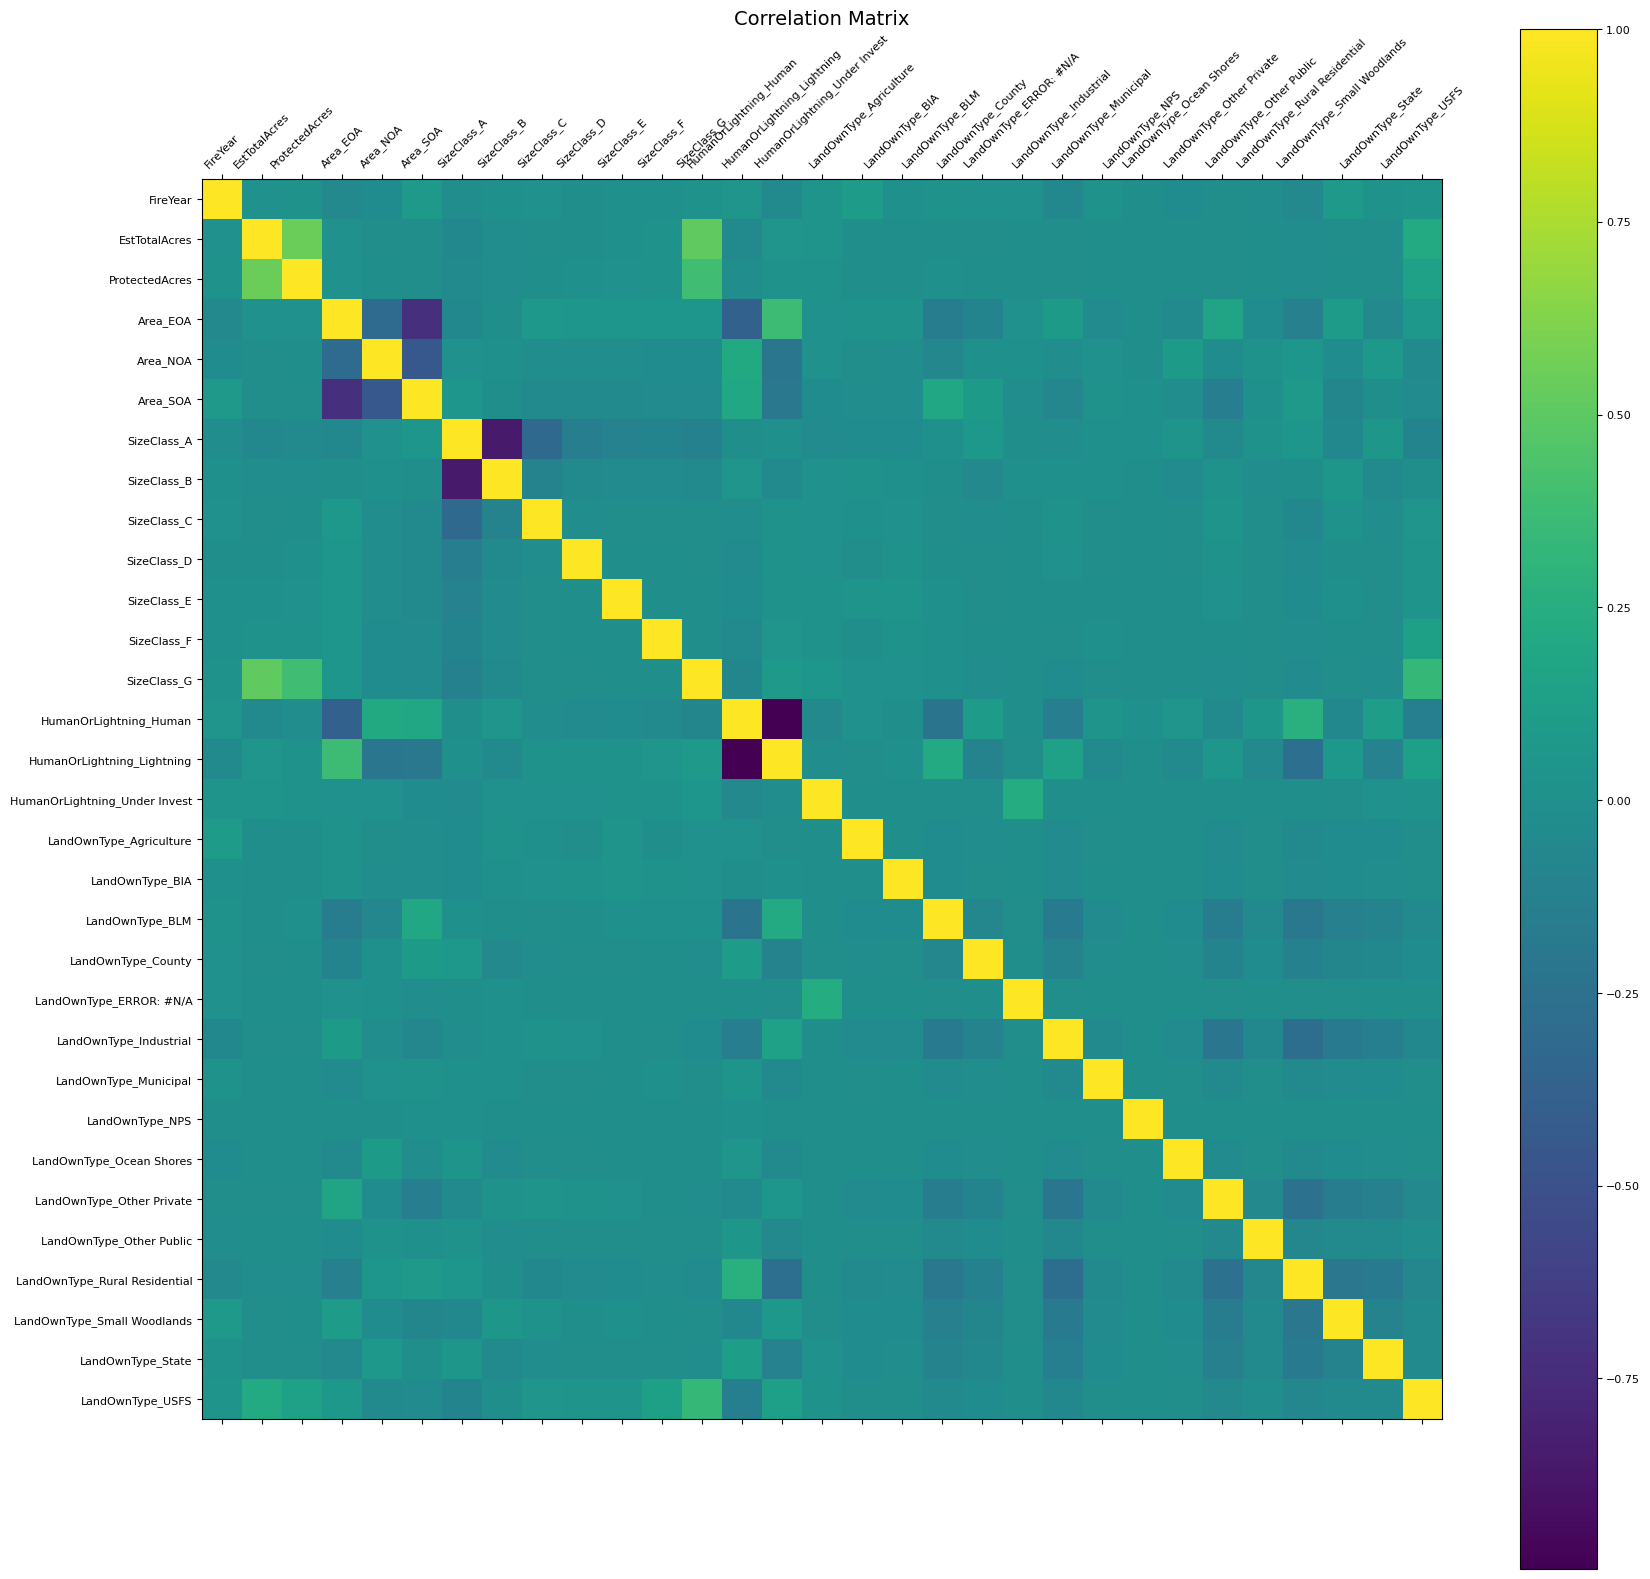

In [11]:
# Creating heatmap with encoded subset correlation matrix
corr_matrix = sub_encoded.corr()
# Plotting heatmap
fig, ax = plt.subplots(figsize=(20, 20)) # figure size 
corr_heat = ax.matshow(corr_matrix) # type of plot
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=8) # y axis labels

# Formatting legend and title
cb = plt.colorbar(corr_heat) # add a colour legend
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.show()

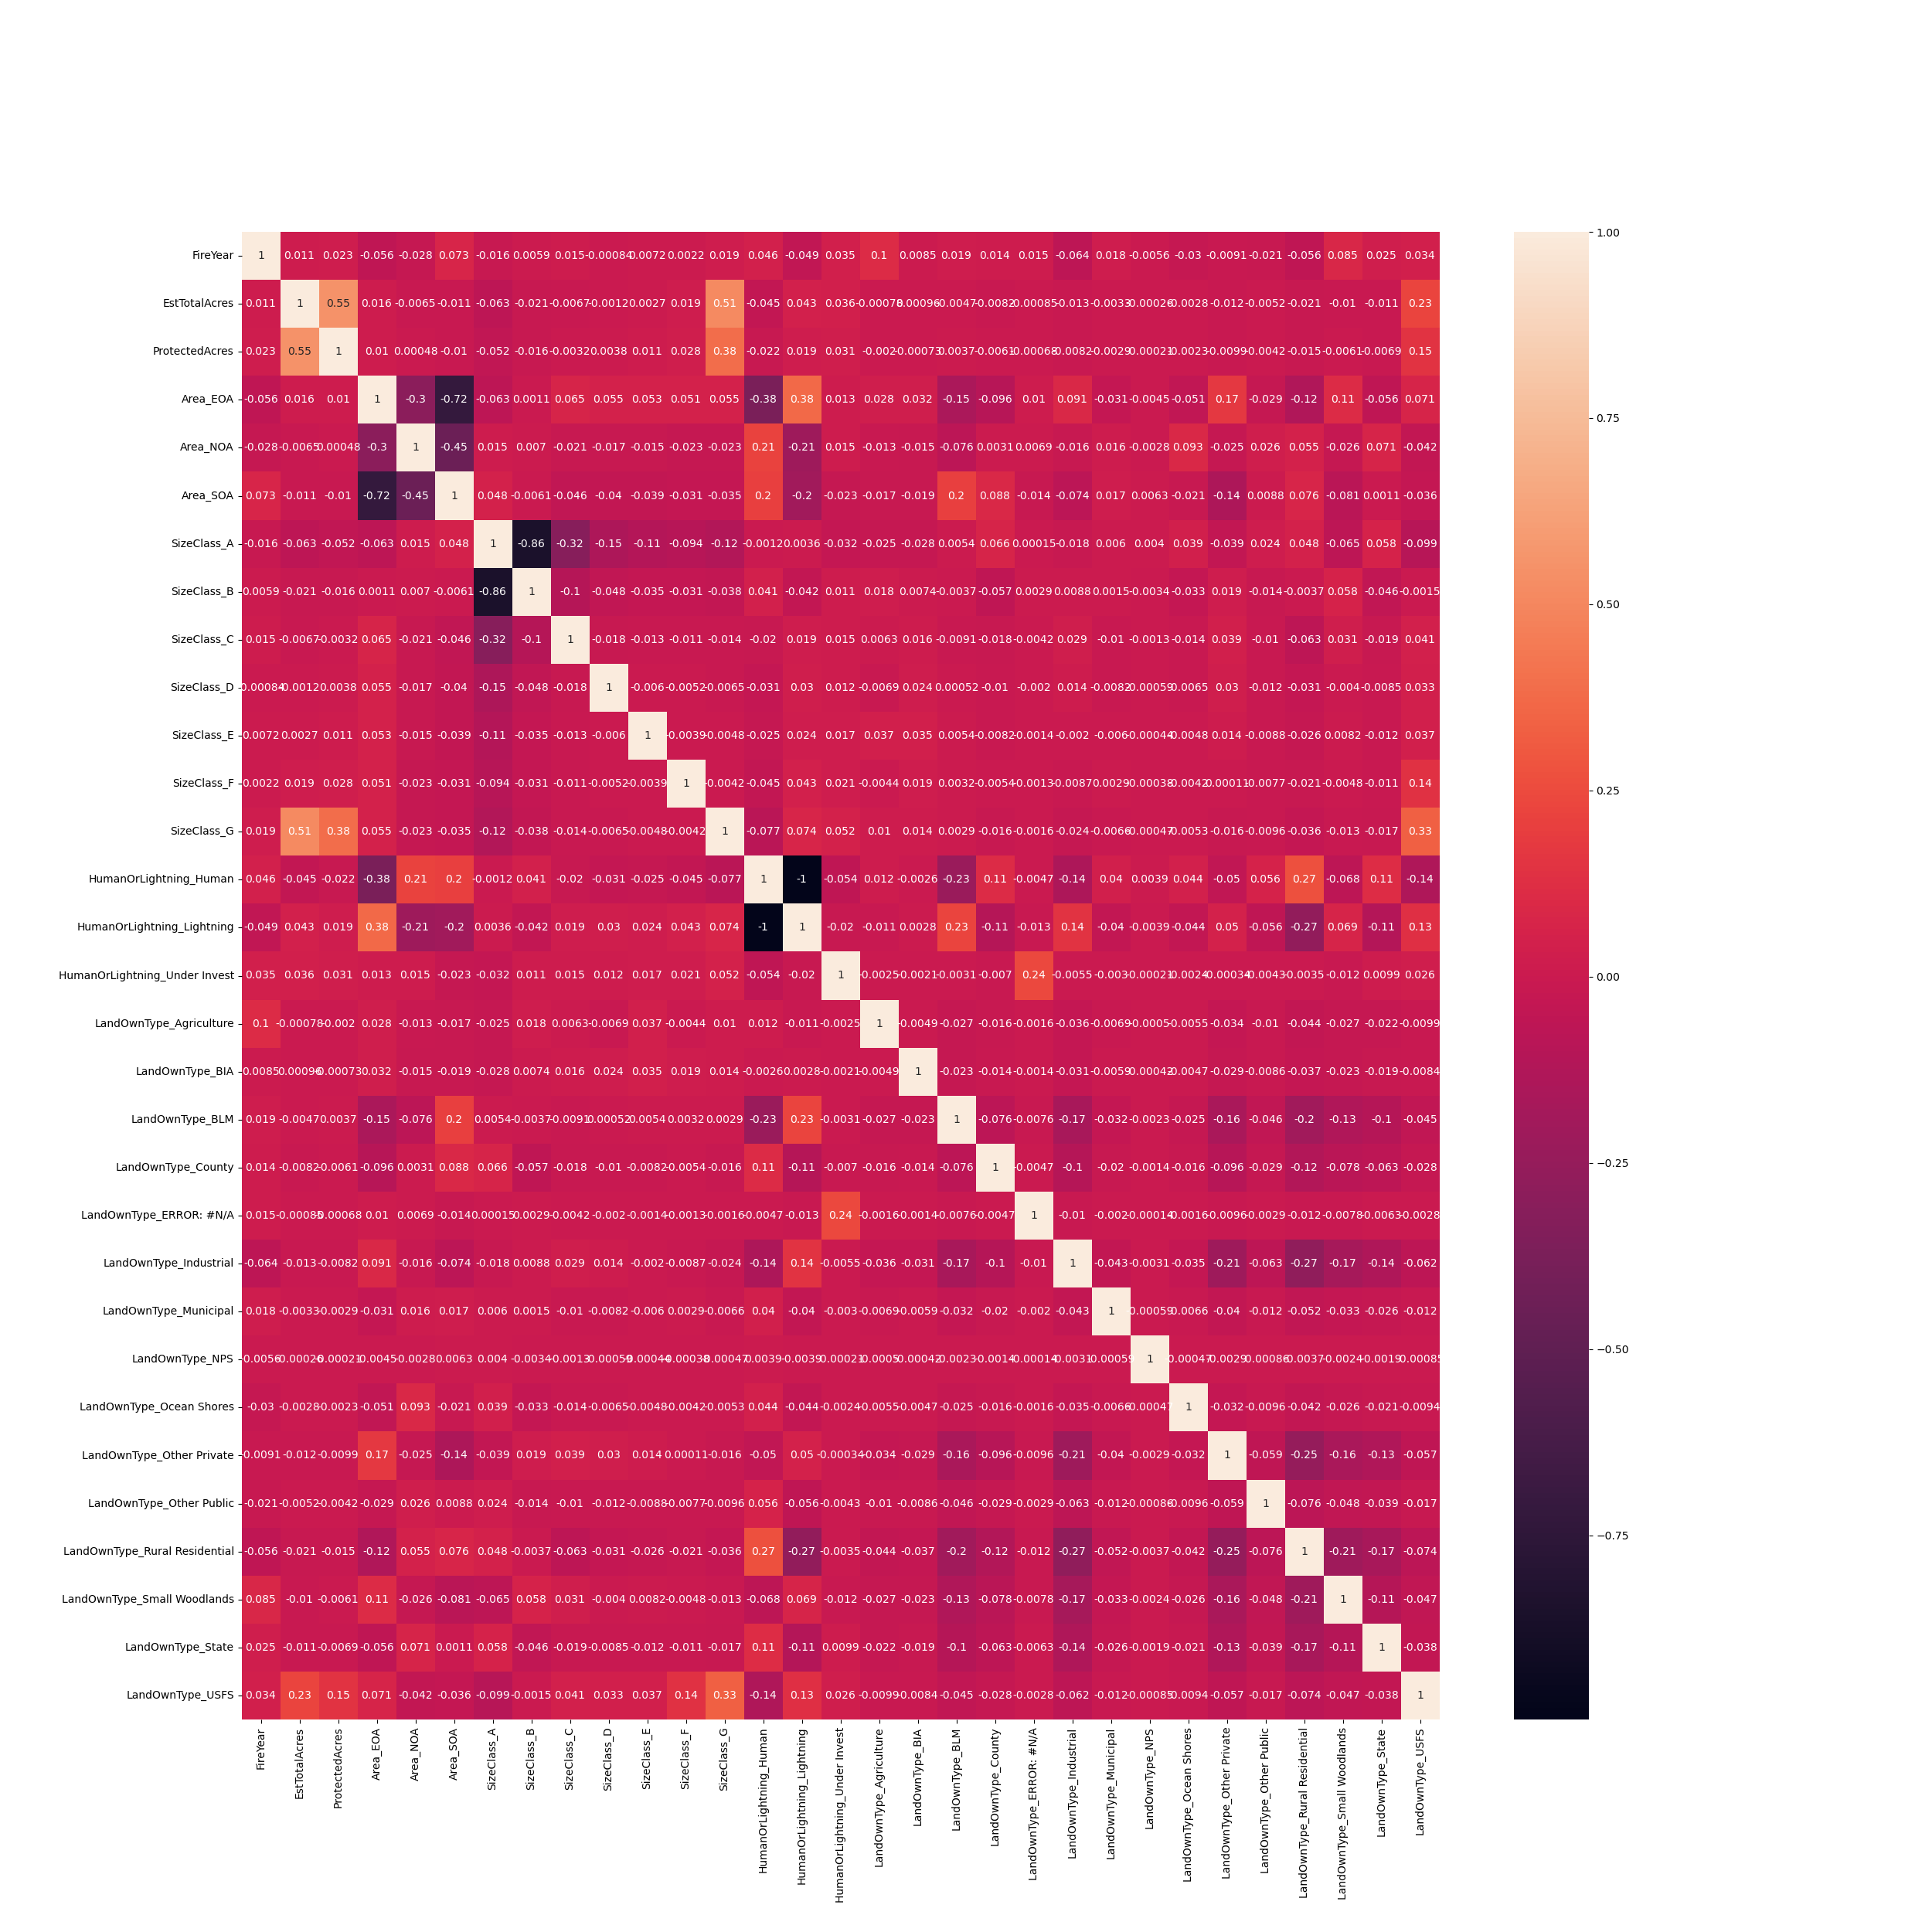

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(25,25))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_encoded.corr(), annot = True, ax = ax)

# Saving as an image
corr_path = os.path.join(path, '04 Analysis', 'Visualizations', 'corr.png') 
f.savefig(corr_path)
plt.close(f)

# Define the file path to display image
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'corr.png') 
# Display saved image 
display(Image(filename=file_path))

##### The correlation heatmap doesn't show much correlation between the variables. There are a few strong correlations, however since I had to encode some of my variables to be able to create the heat map, the correlations aren't what I expected to see. For example: 
> ##### The highest correlation is a negative correlation of -0.86 between SizeClass_B and SizeClass_A but this just means that if a fire isn't a class B then it is most likely a class A. The only useful insight here is that classes A and B are the most common fire class sizes.
> ##### Also, there is a strong negative correlation of -0.72 between Area_EOA and Area_SOA meaning that if there is not a fire in the EOA then it's likely in the SOA. This tells me that the EOA and SOA could have more fires than the NOA. 
##### There are some moderate correlations that could be useful:
> ##### - HumanOrLightning_Lightning and Area_EOA has a moderate correlation (0.38). This could mean that the cause of fires in the EOA are mostly caused by lightning.
> ##### - LandOwnType_USFS and SizeClass_G has a moderate correlation (0.33). This tells me that land owned by the USFS could be more susceptible to fires of G class size.

### **Scatterplots**

#### Because I had to encode my categorical variables to show the correlation, the following scatterplots can only be analyzed by the line showing the strength of the relationship. The points only tell me if it is or isn't the corresponding variable.

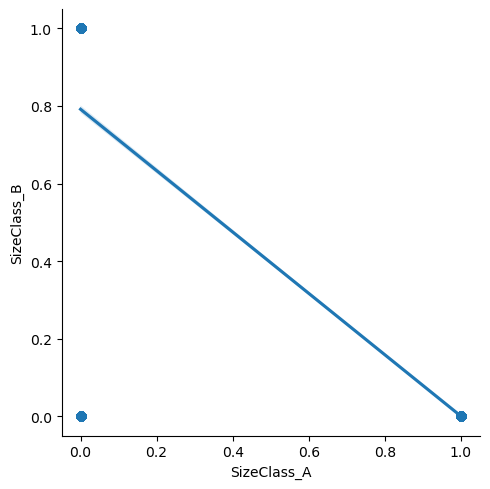

In [15]:
# Create a scatterplot for the "SizeClass_A" and "SizeClass_B" columns
sns.lmplot(x = 'SizeClass_A', y = 'SizeClass_B', data = sub_encoded)
plt.show(1)

##### The downward steepness of the line shows a strong negative correaltion but the points only tell me that if a fire isn't a Class A then it's likely a Class B.

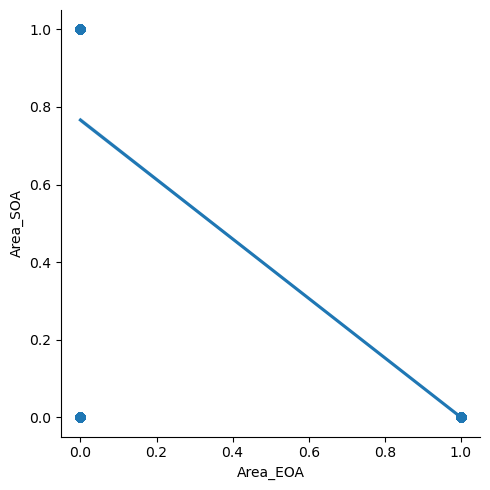

In [17]:
# Create a scatterplot for the "Area_EOA" and "Area_SOA" columns
sns.lmplot(x = 'Area_EOA', y = 'Area_SOA', data = sub_encoded)
plt.show(1)

##### The downward steepness of the line shows a strong negative correlation meaning if a fire doesn't occur in the SOA then it is likely to occure in the EOA and vice versa.

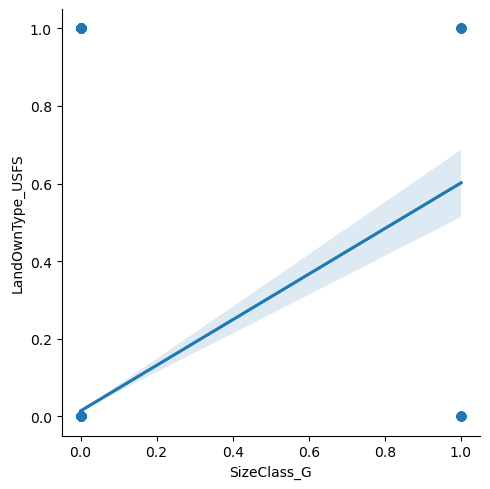

In [16]:
# Create a scatterplot for the "SizeClass_G" and "LandOwnType_USFS" columns
sns.lmplot(x = 'SizeClass_G', y = 'LandOwnType_USFS', data = sub_encoded)
plt.show(1)

##### The upward steepness of the line shows a strong positive correlation so land owned by the USFS has a greater chance of having fires that are Class G, but the points only show that the a fire in USFS owned land either is or isn't a SizeClass_G.

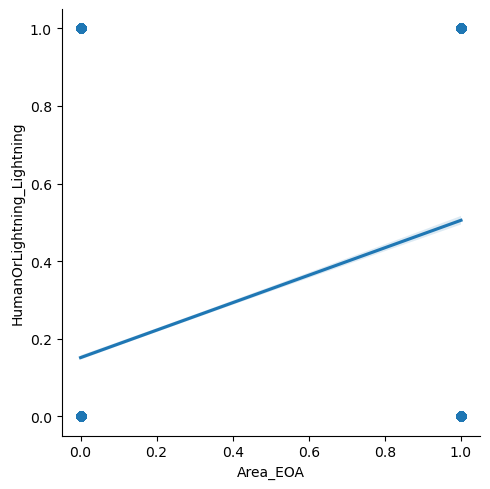

In [27]:
# Create a scatterplot for the "Area_EOA" and "HumanOrLightning_Lightning" columns
sns.lmplot(x = 'Area_EOA', y = 'HumanOrLightning_Lightning', data = sub_encoded)
plt.show(1)

##### The upward steepness of the line shows a moderate positive correlation meaning fires in the EOA are more likely cause by lightning, but again the points only tell me that fires either are or aren't caused by lightning.

### **Pair Plots**

In [11]:
# Creating subset for pair plot
sub_2 = df[['FireYear','Area','SizeClass','EstTotalAcres','ProtectedAcres','HumanOrLightning',]]

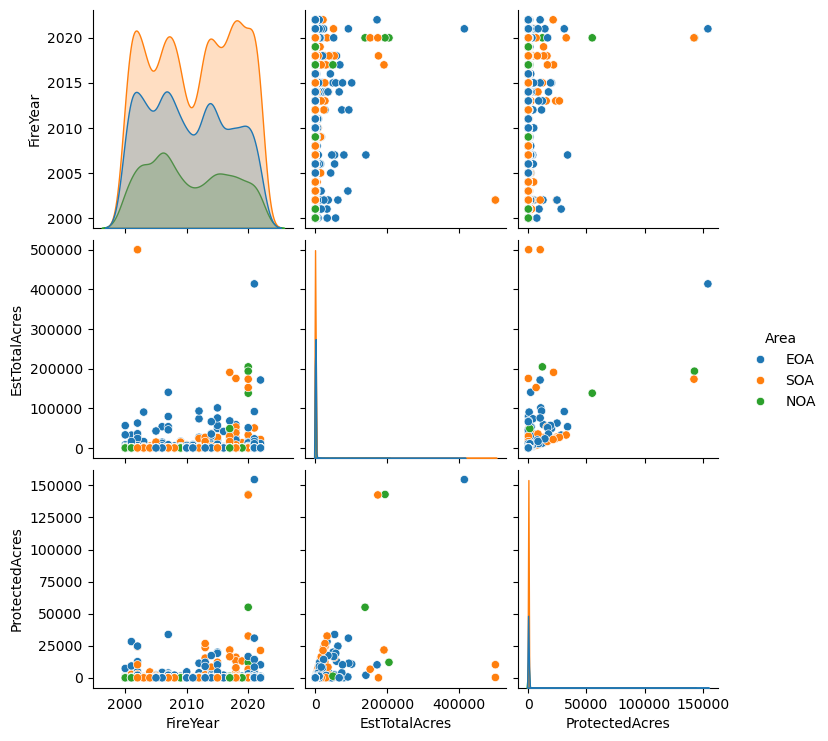

In [16]:
# Create a pair plot of sub_2 showing Area variable
pair_1 = sns.pairplot(sub_2, hue='Area')
plt.show()
# Saving as an image
pair_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_area.png'))

##### Looking at the chart on the top left showing the distribution of fires per year, we can see that most fires occur in the SOA, then the EOA, and NOA has had the fewest. There is also a dip in the middle of the graph meaning around 2011-2012 there were the fewest amount of fires.
##### If we look at the other distribution charts, second row middle and bottom right, we can see that the SOA has the most estimated total acres burned and prtoected acres burned followed by the EOA.
##### There is a slight relationship between FireYear and EstTotalAcres and ProtectedAcres (left column middle and bottom), though it isn't very strong, we can see a heavier cluster of points to the right of the charts (around 2013 and on), and slightly higher up the charts (more acres burned), indicating that fires have happened more frequently and were more destructive in recent years than in the past.
##### These scatterplots don't show much correlation, which leads me to believe that wildfires are very unpredictable.

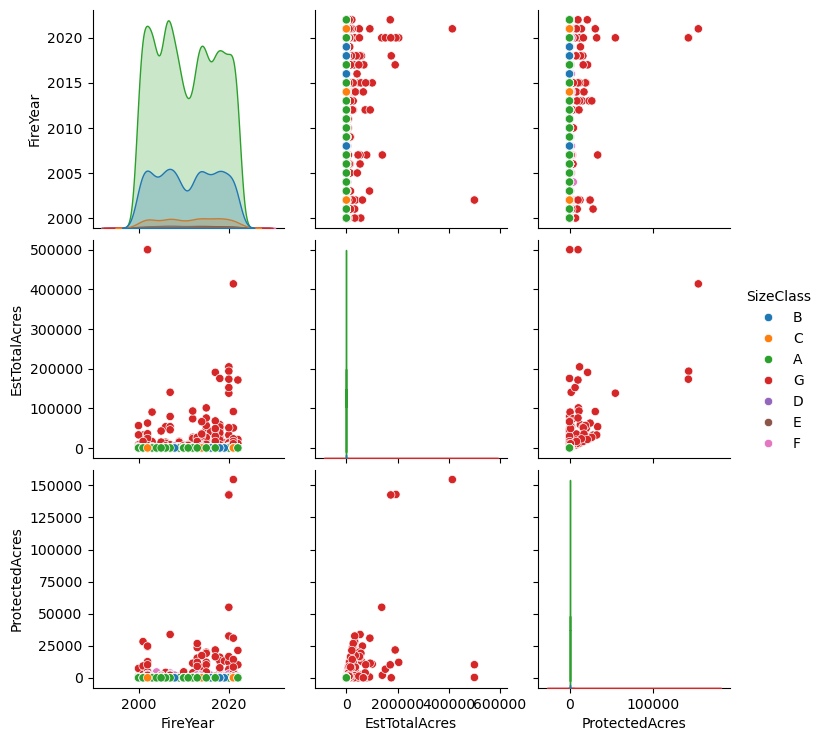

In [17]:
# Create a pair plot of sub_2 showing SizeClass variable
pair_2 = sns.pairplot(sub_2, hue='SizeClass')
plt.show()
# Saving as an image
pair_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_size.png'))

##### The chart on the top left of FireYear distribution shows that class A fires are by far the most common followed by class B fires.
##### The rest of the scatterplots don't provide much insight. 

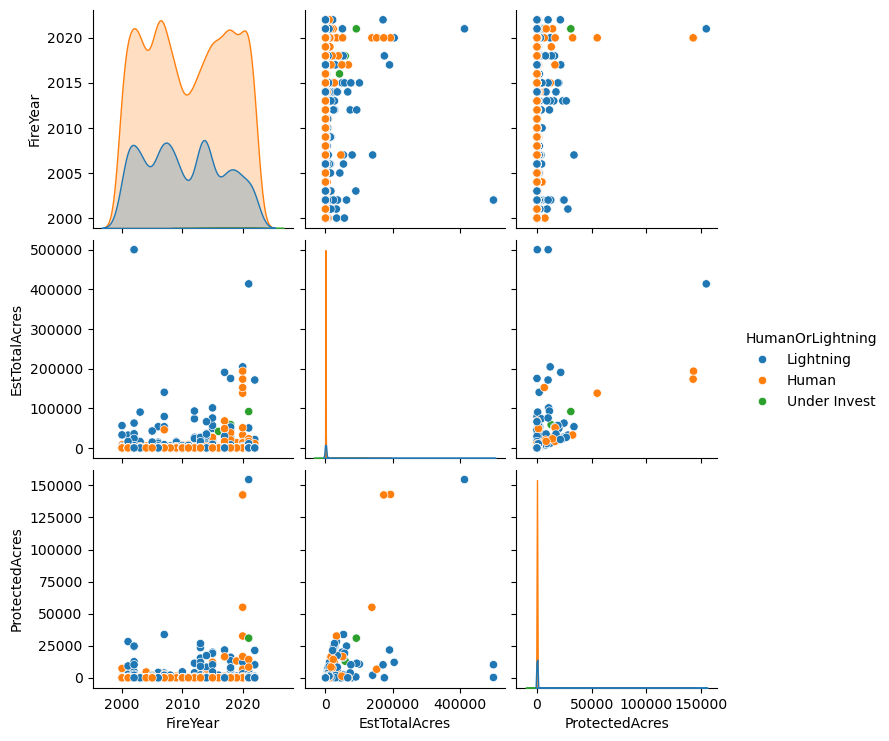

In [18]:
# Create a pair plot of sub_2 showing HumanOrLightning variable
pair_3 = sns.pairplot(sub_2, hue='HumanOrLightning')
plt.show()
# Saving as an image
pair_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_hol.png'))

##### Again, here the scatterplots don't provide much insight but we can see in the top left chart that humans are the main cause of most of the fires compared to lightning.

### **Categorical Plots**

<Axes: xlabel='EstTotalAcres', ylabel='Count'>

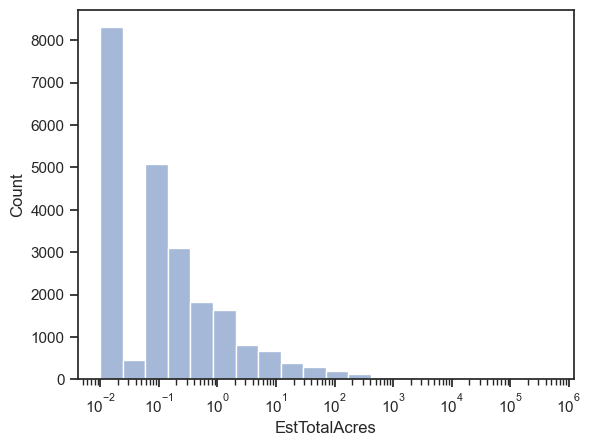

In [20]:
# Creating a categorical plot for EstTotalAcres
sns.histplot(df['EstTotalAcres'], bins = 20, log_scale=True, kde = True)

In [12]:
# Creating 'Minor Burn' category in TotalBurnTier flag based on histogram
df.loc[df['EstTotalAcres'] < 1, 'TotalBurnTier']='Minor Burn'

In [13]:
# Creating 'Moderate Burn' category in TotalBurnTier flag based on histogram
df.loc[(df['EstTotalAcres'] >= 1) & (df['EstTotalAcres'] < 100), 'TotalBurnTier']='Moderate Burn'

In [14]:
# Creating 'Major Burn' category in TotalBurnTier flag based on histogram
df.loc[df['EstTotalAcres'] >= 100, 'TotalBurnTier']='Major Burn'

In [15]:
# Checking value counts of TotalBurnTier
df['TotalBurnTier'].value_counts(dropna = False)

TotalBurnTier
Minor Burn       19157
Moderate Burn     3821
Major Burn         502
Name: count, dtype: int64

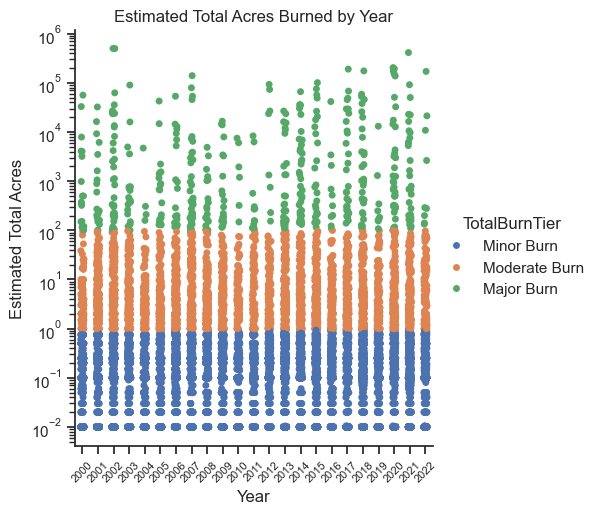

In [25]:
# Create a categorical plot in seaborn using the TotalBurnTier created above
sns.set(style="ticks")
year_totalburn = sns.catplot(x="FireYear", y="EstTotalAcres", hue="TotalBurnTier", data=df)
plt.xticks(fontsize=8, rotation=45)
plt.title('Estimated Total Acres Burned by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Total Acres')
# Customizing y-axis ticks
ax = year_totalburn.ax 
ax.set_yscale('log')
# Saving as an image
year_totalburn.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'year_totalburn.png'))

##### This chart provides a general look at the distribution of the amount of acres burned over the years. It looks like there were 2 fires in 2002 that burned the most total acres. Also, it looks like 2004 had the fewest "Major Burn" fires and there were fewer fires in general aorund 2010-2012.

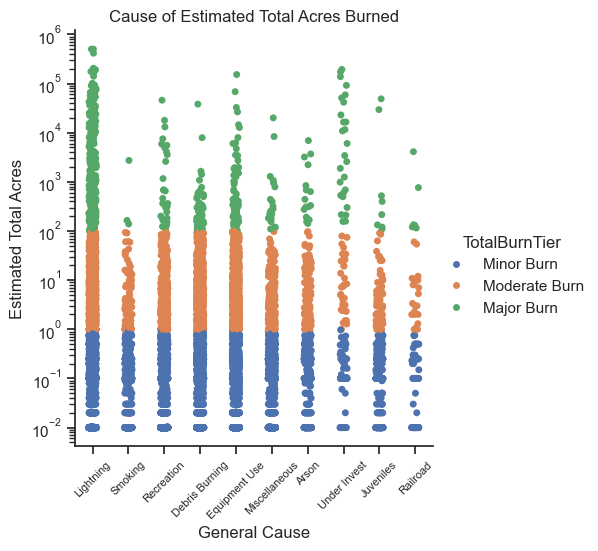

In [26]:
# Create a categorical plot of EstTotalAcres vs GeneralCause using the TotalBurnTier created above
sns.set(style="ticks")
cause_totalburn = sns.catplot(x="GeneralCause", y="EstTotalAcres", hue="TotalBurnTier", data=df)
plt.xticks(fontsize=8, rotation=45)
plt.title('Cause of Estimated Total Acres Burned')
plt.xlabel('General Cause')
plt.ylabel('Estimated Total Acres')
# Customizing y-axis ticks
ax = cause_totalburn.ax 
ax.set_yscale('log')
# Saving as an image
cause_totalburn.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cause_totalburn.png'))

##### This categorical chart provides good insight on the tier of fire and the cause. We can't very well tell which cause was responsible for the most fires, but we can see which causes created the most devastating fires. Lightning by far is the cause of the most "Major Burn" fires. For human causes, it looks like either equipment use or debris burning are the causes of the most "Major Burn" fires, while smoking caused the fewest. We can also see that railroad incidents caused the fewest fires overall. 

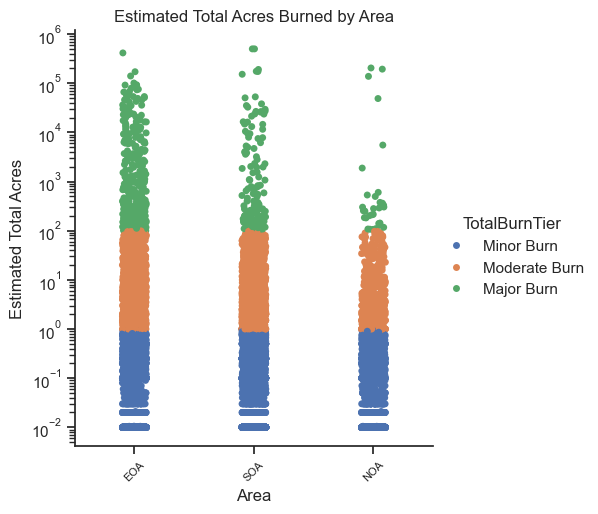

In [38]:
# Create a categorical plot of EstTotalAcres vs Area using the TotalBurnTier created above
sns.set(style="ticks")
area_totalburn = sns.catplot(x="Area", y="EstTotalAcres", hue="TotalBurnTier", data=df)
plt.xticks(fontsize=8, rotation=45)
plt.title('Estimated Total Acres Burned by Area')
plt.xlabel('Area')
plt.ylabel('Estimated Total Acres')
# Customizing y-axis ticks
ax = area_totalburn.ax 
ax.set_yscale('log')
# Saving as an image
area_totalburn.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'area_totalburn.png'))

##### We can clearly see that the EOA had the most "Major Burn" fires, however the "moderate" and "minor" tiers are harder to discern from the density of the points. 

<Axes: xlabel='ProtectedAcres', ylabel='Count'>

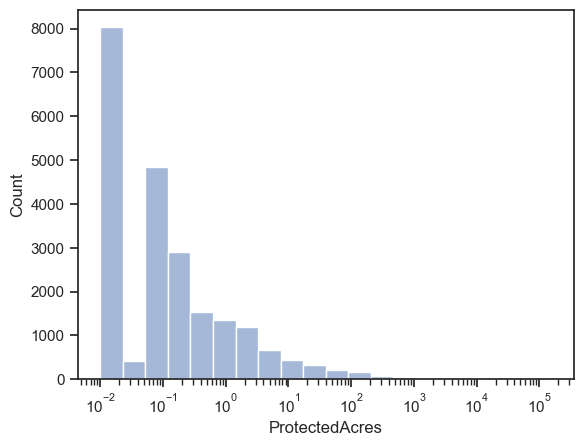

In [39]:
# Creating a categorical plot for ProtectedAcres
sns.histplot(df['ProtectedAcres'], bins = 20, log_scale=True, kde = True)

In [16]:
# Creating 'Minor Burn' category in ProtectedBurnTier flag based on histogram
df.loc[df['ProtectedAcres'] < 1, 'ProtectedBurnTier']='Minor Burn'

In [17]:
# Creating 'Moderate Burn' category in ProtectedBurnTier flag based on histogram
df.loc[(df['ProtectedAcres'] >= 1) & (df['ProtectedAcres'] < 100), 'ProtectedBurnTier']='Moderate Burn'

In [18]:
# Creating 'Major Burn' category in ProtectedBurnTier flag based on histogram
df.loc[df['ProtectedAcres'] >= 100, 'ProtectedBurnTier']='Major Burn'

In [19]:
# Checking value counts of ProtectedBurnTier
df['ProtectedBurnTier'].value_counts(dropna = False)

ProtectedBurnTier
Minor Burn       19403
Moderate Burn     3691
Major Burn         386
Name: count, dtype: int64

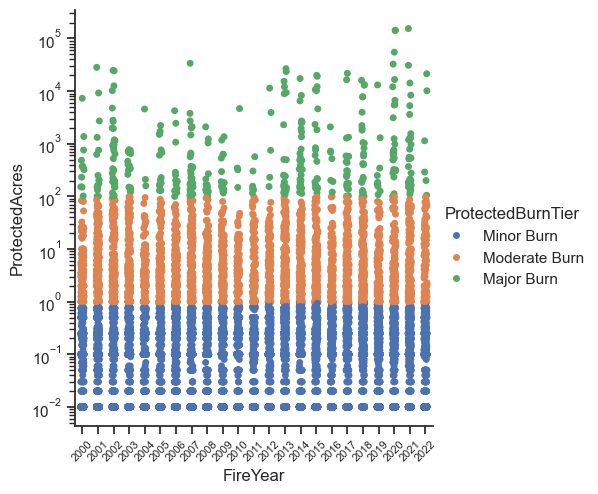

In [44]:
# Create a categorical plot in seaborn using the ProtectedBurnTier created above
sns.set(style="ticks")
year_protectburn = sns.catplot(x="FireYear", y="ProtectedAcres", hue="ProtectedBurnTier", data=df)
plt.xticks(fontsize=8, rotation=45)
# Customizing x-axis ticks
ax = year_protectburn.ax 
ax.set_yscale('log')
# Saving as an image
year_protectburn.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'year_protectburn.png'))

##### The ProtectedAcres chart looks very similar to the EstTotalAcres chart just with fewer points since there are generaly fewer protected acres burned.

C:\Users\jboer\AppData\Local\Temp\ipykernel_32560\2096597972.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  year_counts_bar = sns.barplot(x='FireYear', y='Count', data=year_counts_df, palette='viridis', ax=ax)


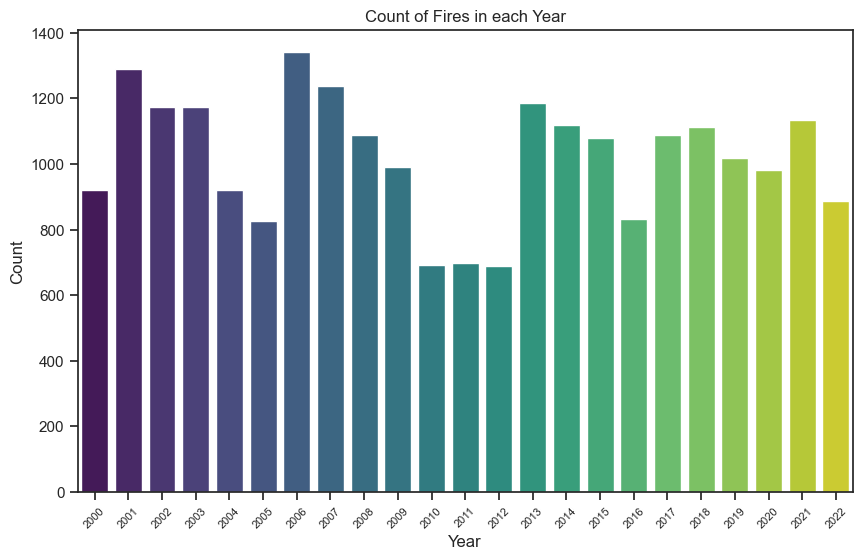

In [47]:
# Creating a bar chart to count the number of fires in each year

# Count the occurrences of each value in the column 
year_counts = df['FireYear'].value_counts().sort_index() 
# Convert the counts to a DataFrame for plotting 
year_counts_df = year_counts.reset_index() 
year_counts_df.columns = ['FireYear', 'Count'] 
# Create a bar plot of the counts
fig_1, ax = plt.subplots(figsize=(10, 6))
year_counts_bar = sns.barplot(x='FireYear', y='Count', data=year_counts_df, palette='viridis', ax=ax) 
# Add labels and title 
plt.xticks(fontsize=8, rotation=45)
plt.xlabel('Year') 
plt.ylabel('Count') 
plt.title('Count of Fires in each Year')
# Saving as an image
fig_1.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'year_counts.png'))

##### The most fires occurred in the year 2006 followed by 2001, with 2012 having the fewest fires. Looking at the chart there almost seems to be a trend happening. After a year with a high amount of fires happens, the next 4-6 years have fewer and fewer fires. Is there a reason for this or is it just because so many fires happened that it takes a few years for the vegetation to grow back, which then creates more area to burn again and continues that cycle?

C:\Users\jboer\AppData\Local\Temp\ipykernel_32560\1591338869.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sizegroup = df.groupby('SizeClass').sum().reset_index()


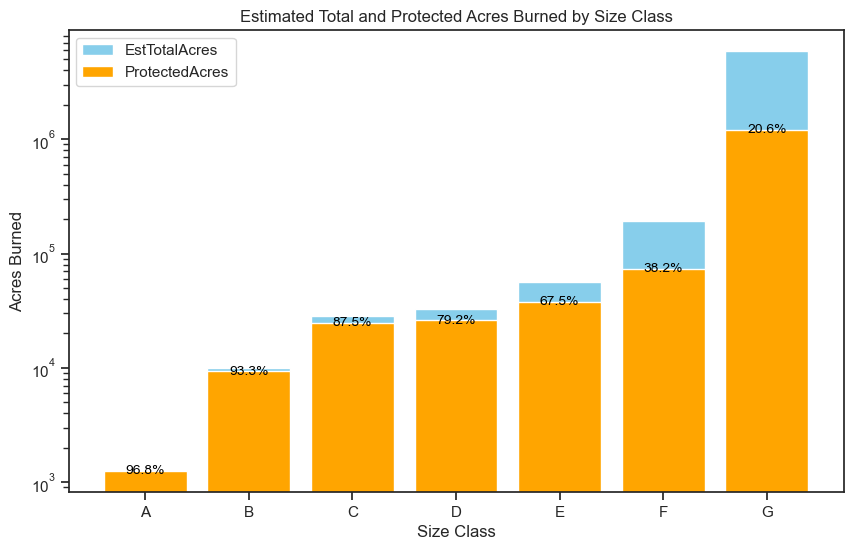

In [48]:
# Sorting values alphabetically
df['SizeClass'] = pd.Categorical(df['SizeClass'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
# Grouping by SizeClass and summing the acres 
df_sizegroup = df.groupby('SizeClass').sum().reset_index()
# Calculate percentage of ProtectedAcres 
df_sizegroup['PercentProtected'] = (df_sizegroup['ProtectedAcres'] / df_sizegroup['EstTotalAcres']) * 100
# Plotting 
fig_2, ax = plt.subplots(figsize=(10, 6)) 
# Stacked bar plot 
ax.bar(df_sizegroup['SizeClass'], df_sizegroup['EstTotalAcres'], label='EstTotalAcres', color='skyblue') 
ax.bar(df_sizegroup['SizeClass'], df_sizegroup['ProtectedAcres'], label='ProtectedAcres', color='orange') 
# Annotate percentage of ProtectedAcres 
for i in range(len(df_sizegroup)): 
    plt.text(df_sizegroup['SizeClass'][i], df_sizegroup['ProtectedAcres'][i], 
             f"{df_sizegroup['PercentProtected'][i]:.1f}%", ha='center', va='center', color='black', fontsize=10) 
# Labels and title 
ax.set_xlabel('Size Class') 
ax.set_ylabel('Acres Burned') 
ax.set_title('Estimated Total and Protected Acres Burned by Size Class') 
ax.set_yscale('log')
ax.legend() 
plt.show()
# Saving as an image
fig_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'year_counts.png'))

##### The proportions are off because I had to plot this data using a logarithmic scale to be able to see it all, but we can see that each succession of size class is responsible for more acres burned. And there is a negative relationship between the acres burned of each class and the protected acres burned. As the total acres burned increases the proportion of protected acres decreases. For example, for class A fires nearly 97% of the approximately 1,000 total burned acres was protected land and for the class G fires the total acres burned is nearly 10,000,000 acres and only about 20% of that was protected land.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lightning'),
  Text(1, 0, 'Smoking'),
  Text(2, 0, 'Recreation'),
  Text(3, 0, 'Debris Burning'),
  Text(4, 0, 'Equipment Use'),
  Text(5, 0, 'Miscellaneous'),
  Text(6, 0, 'Arson'),
  Text(7, 0, 'Under Invest'),
  Text(8, 0, 'Juveniles'),
  Text(9, 0, 'Railroad')])

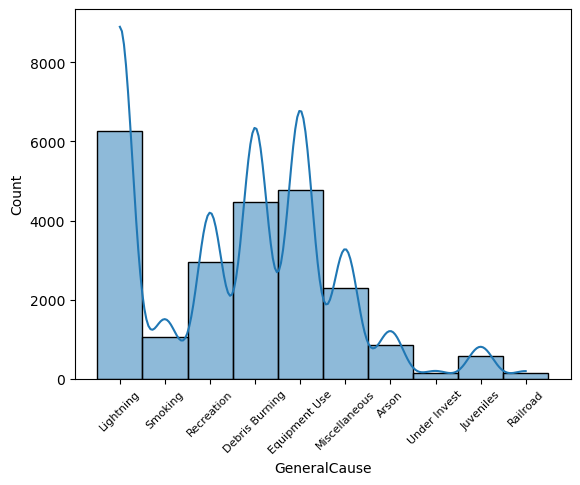

In [53]:
# Creating a categorical plot for GeneralCause
sns.histplot(df['GeneralCause'], bins = 20, kde = True)
plt.xticks(fontsize=8, rotation=45) # x axis labels

##### Of the general causes individually, lightning is the top cause of wildfires with just over 6000 fires casused by lightning. However, if we are comparing causes of nature and humans, human causes far exceed causes of nature. And of those human causes, the leader is equipment use (about 5000) with debris burning (about 4500) not far behind. The total of those two causes alone outweigh the amount of fires caused by lightning.

In [18]:
# Finding the total acres and protected acres burned for each area
area_sub = df[['Area','EstTotalAcres','ProtectedAcres']]
area_total = area_sub.groupby('Area').sum().reset_index()
print(area_total)

  Area  EstTotalAcres  ProtectedAcres
0  EOA   3.246428e+06       659741.47
1  NOA   6.038384e+05       225320.94
2  SOA   2.359517e+06       498380.64


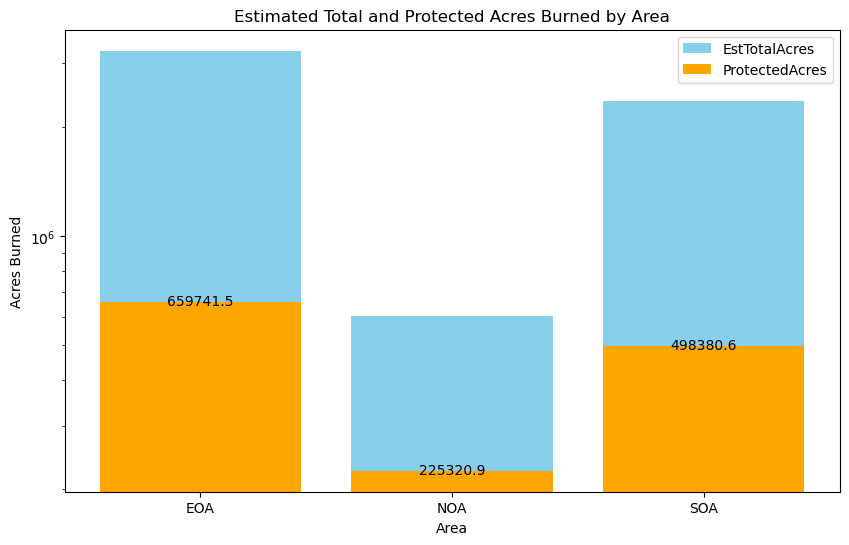

In [20]:
fig_3, ax = plt.subplots(figsize=(10, 6)) 
# Stacked bar plot 
ax.bar(area_total['Area'], area_total['EstTotalAcres'], label='EstTotalAcres', color='skyblue') 
ax.bar(area_total['Area'], area_total['ProtectedAcres'], label='ProtectedAcres', color='orange')
# Annotating values
for i in range(len(area_total)): 
    plt.text(area_total['Area'][i], area_total['ProtectedAcres'][i], 
             f"{area_total['ProtectedAcres'][i]:.1f}", ha='center', va='center', color='black', fontsize=10)
# Labels and title 
ax.set_xlabel('Area') 
ax.set_ylabel('Acres Burned') 
ax.set_title('Estimated Total and Protected Acres Burned by Area') 
ax.set_yscale('log')
ax.legend()
# Saving as an image
fig_3.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'area_burn.png'))

In [11]:
# Finding the total acres and protected acres burned for each year
year_sub = df[['FireYear','EstTotalAcres','ProtectedAcres']]
year_total = year_sub.groupby('FireYear').sum().reset_index()
year_total_sorted = year_total.sort_values(by='EstTotalAcres', ascending=False)
print(year_total_sorted)

    FireYear  EstTotalAcres  ProtectedAcres
2       2002   1.258497e+06        99167.60
20      2020   1.019398e+06       434408.03
21      2021   6.762695e+05       231493.71
17      2017   4.934394e+05        47163.24
18      2018   4.615373e+05        76774.40
15      2015   3.861266e+05        86848.52
7       2007   3.716177e+05        54732.59
14      2014   2.871436e+05        53386.74
12      2012   2.208129e+05        17547.43
22      2022   2.088199e+05        34768.89
13      2013   1.283125e+05       104166.51
3       2003   1.233914e+05         8619.05
6       2006   1.203775e+05        11270.00
0       2000   1.133390e+05        12888.84
1       2001   7.599423e+04        46641.34
5       2005   7.125431e+04        11609.33
9       2009   6.569979e+04         7034.23
16      2016   5.049936e+04         5661.05
11      2011   1.829872e+04         2637.16
10      2010   1.801589e+04         6121.34
19      2019   1.730087e+04        17075.53
8       2008   1.721779e+04     

In [15]:
# Finding sum of EstTotalAcres and ProtectedAcres
year_total_sorted.sum()

FireYear          4.625300e+04
EstTotalAcres     6.209782e+06
ProtectedAcres    1.383443e+06
dtype: float64

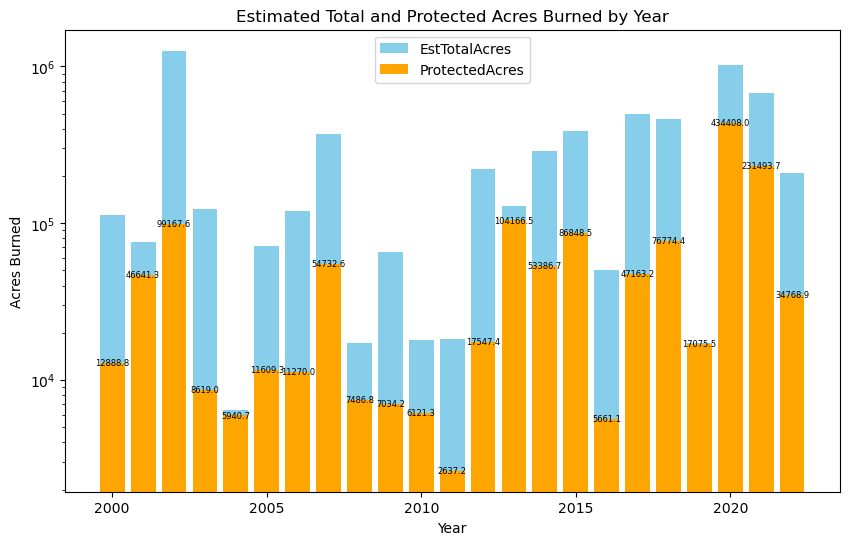

In [21]:
fig_4, ax = plt.subplots(figsize=(10, 6)) 
# Stacked bar plot 
ax.bar(year_total_sorted['FireYear'], year_total_sorted['EstTotalAcres'], label='EstTotalAcres', color='skyblue') 
ax.bar(year_total_sorted['FireYear'], year_total_sorted['ProtectedAcres'], label='ProtectedAcres', color='orange')
# Annotating values
for i in range(len(year_total_sorted)): 
    plt.text(year_total_sorted['FireYear'][i], year_total_sorted['ProtectedAcres'][i], 
             f"{year_total_sorted['ProtectedAcres'][i]:.1f}", ha='center', va='center', color='black', fontsize=6)
# Labels and title 
ax.set_xlabel('Year') 
ax.set_ylabel('Acres Burned') 
ax.set_title('Estimated Total and Protected Acres Burned by Year') 
ax.set_yscale('log')
ax.legend()
# Saving as an image
fig_4.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'year_burn.png'))

## **03. Revisting Questions**

#### What year had the most wildfires?
    - 2006
#### What area of Oregon has the most wildfires?
    - EOA
#### How much area was burned in total and in each area of Oregon?
    - Total: about 6.2 million acres including 1.4 million acres of protected land
    - EOA: about 3.2 million acres/660,000 acres protected land
    - SOA: about 2.4 million acres/500,000 acres protected land
    - NOA: about 600,000 acres/225,000 acres protected land
#### What area/year had the worst wildfires?
    - 2002 had the most total acres burned (1.26 million acres), but 2020 had the second most total acres burned (1.02 million acres) and the most protected acres burned (434,000 ares).
    - The EOA had the most total acres and protected acres burned.
#### What is the main cause of wildfires?
    - Looking at the general causes, lightning is the main cause of wildfires with it being the cause of just over 6000 wildfires. Between nature and humans, humans cause far more fires than lightning. The main cause of human started fires is equipment use which has caused about 5000 wildfires.
#### Have the number of wildfires been increasing, decreasing, or staying the same over time?
    - It varies from year to year, it did look like there was a slight trend in the number of wildfires over a few year period, with a high number of fires in one year then fewer and fewer in subsequent years before rising significantly again. Not sure if there is a reason for this or it's just a coincidence. See "Count of Fires in each Year" chart.
#### Has the intensity of wildfires been increasing, decreasing, or staying the same over time?
    - Will need to look at how SizeClass is distributed throughout the years. But looking at the "Estimated Total and Protected Acres Burned by Year" chart above it looks like the instensity of fires is completely random from year to year.
#### How much time is there between the time of ignition and time of discovery? Then between discovery and control of the fire? Have times decreased or increased over the years?
    - Not known at this time.
#### Is there a correlation between the sizes of fires and the areas in which they occur?
    - There was no real correlation on my correlation chart but could look into further to make sure.  
#### Is there a correlation between the cause of a fire and its size?
    - My correlation chart showed a moderate relationship (0.38) between the EOA and wildfires caused by lightning, leading my to believe that the EOA may be more prone to lightning strikes than the other areas in Oregon. 
#### Is there a correlation between the type of land ownership where the fire originated and the cause or intensity of the fire?
    - The only correlation I found was a moderate relationship (0.33) between land owned by the USFS and class G fires. This makes sense though as most of the land owned by the USFS is national parks and other non-developed land, so when fires start here they take longer to get to and put out which increases their chance of becoming a class G wildfire.

## **04. Hypotheses**

#### 1. If a fire was caused by a human, then it was likely due to equipment use or debris burning.
#### 2. If a fire was started by lightning, then it most likely happened in the EOA.
#### 3. If a wildfire is classified as a class G, then it most likely originated on USFS land.

## **05. Exporting Data**

In [20]:
# Exporting cleaned dataset
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fire_occurrence_clean_2.csv'))